# Task 3: Implement K-Nearest Neighbors (KNN) Classifier

## Library

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Data

In [4]:
# Storage directory
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

In [ ]:
# Load dataset without resaving
train_data = pd.read_csv(os.path.join(DATA_DIR, "iris_train.csv"))
test_data = pd.read_csv(os.path.join(DATA_DIR, "iris_test.csv"))

In [11]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (120, 5)
Test Data Shape: (30, 5)


## Split Data

In [ ]:
# Separate features and targets
X_train = train_data.iloc[:, :-1]  # All columns except species
y_train = train_data.iloc[:, -1]   # Column species as target
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

## Model, Predict, & Evaluate

In [ ]:
# Trying different values of K and comparing the results
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []
best_k = None
best_acc = 0
conf_matrices = {}

In [ ]:
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # model Evaluation
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    conf_matrices[k] = confusion_matrix(y_test, y_pred)

    if acc > best_acc:
        best_acc = acc
        best_k = k

    print(f"\n🔹 K = {k}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrices[k])
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


🔹 K = 1
Accuracy: 0.9667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


🔹 K = 3
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔹 K = 5
Accuracy: 1.0000
Conf

## Visualization

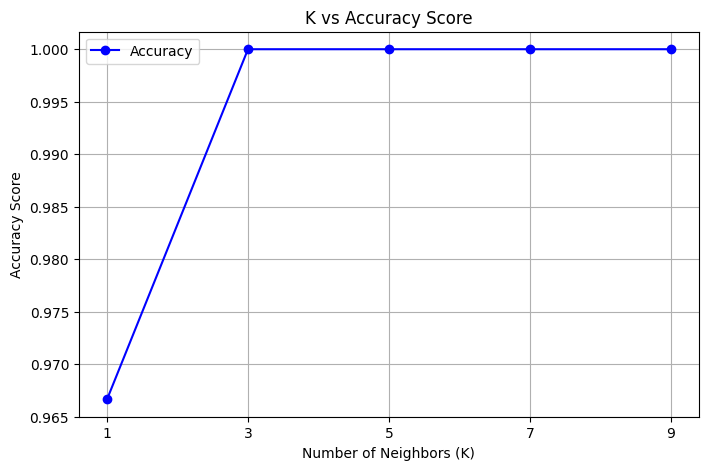

In [ ]:
# Plot of comparison results of K values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy Score")
plt.title("K vs Accuracy Score")
plt.xticks(k_values)
plt.grid(True)
mplcursors.cursor(hover=True)  # Add a hover effect to the data point
plt.legend()
plt.show()

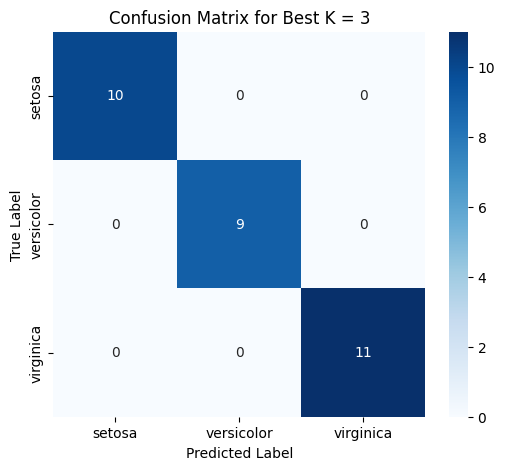


🎯 Best K: 3 with Accuracy: 1.0000


In [ ]:
# Confusion Matrix visualization for the best K
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrices[best_k], annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for Best K = {best_k}")
plt.show()

print(f"\n🎯 Best K: {best_k} with Accuracy: {best_acc:.4f}")